In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from data_preprocessing_final import cleaning
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [2]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col = 0)
housing = housing[housing['SaleCondition'] == 'Normal']

In [3]:
housing = cleaning(housing)

In [4]:
housing

,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleCondition,Bsmt_Unfin_Ratio,TotalLivArea
1,909176150,126000,30,RL,68.217524,7890,Reg,Lvl,Corner,Gtl,...,0,0,0,166,No_Fence,3,2010,Normal,0.721963,1712.0
2,905476230,139500,120,RL,42.000000,4235,Reg,Lvl,Inside,Gtl,...,105,0,0,0,No_Fence,2,2009,Normal,0.099142,2098.0
3,911128020,124900,30,C (all),60.000000,6060,Reg,Lvl,Inside,Gtl,...,0,42,86,0,No_Fence,11,2007,Normal,0.119474,1838.0
4,535377150,114000,70,RL,80.000000,8146,Reg,Lvl,Corner,Gtl,...,0,168,0,111,No_Fence,5,2009,Normal,1.000000,1444.0
5,534177230,227000,60,RL,70.000000,8400,Reg,Lvl,Inside,Gtl,...,45,0,0,0,No_Fence,11,2009,Normal,0.206173,2475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,121000,30,RL,68.217524,8854,Reg,Lvl,Inside,Gtl,...,98,0,0,40,No_Fence,5,2009,Normal,1.000000,1904.0
760,905402060,139600,20,RL,68.217524,13680,IR,Lvl,CulDSac,Gtl,...,0,0,0,0,No_Fence,6,2009,Normal,0.000000,1733.0
761,909275030,145000,90,RH,82.000000,6270,Reg,HLS,Inside,Gtl,...,0,0,0,0,No_Fence,8,2007,Normal,0.716284,3003.0
762,907192040,217500,60,RL,68.217524,8826,Reg,Lvl,Inside,Gtl,...,96,0,0,0,No_Fence,7,2007,Normal,0.146193,2827.0


In [5]:
def ord_enc_func(housing):
    housing = housing.reset_index() #duplicated index values in csv need to reset
    housing = housing.drop('index', axis = 1) # drop original index with duplicates
    price = housing['SalePrice'] # Create Y Variable
    
    housing_num = housing.select_dtypes(['int64', 'float64']) # Select numeric data types
    housing_num = housing_num.drop(['PID', 'SalePrice', 'MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold'], axis = 1)
    
    category = housing.select_dtypes('object') #Select all 'object' data types  which are all categorical
    housing_num2cat = housing[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']]
    category = pd.concat([category.astype(str), housing_num2cat.astype(str)], axis = 1) #Add all categorical features to dataframe to be encoded
    
    oe = OrdinalEncoder()
    cat_ord_enc = oe.fit_transform(category)
    cat_ord_enc = pd.DataFrame(cat_ord_enc, columns = category.columns)
    full_oe_data = pd.concat([housing_num, cat_ord_enc], axis = 1) #Concatenate encoded data and numeric data
    
    return full_oe_data, pd.DataFrame(price)

In [6]:
X,y = ord_enc_func(housing)

In [7]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,...,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
0,68.217524,7890,1939,1950,0.0,2,2,1,1939.0,399.0,...,3.0,5.0,2.0,4.0,0.0,6.0,6.0,5.0,5.0,4.0
1,42.000000,4235,1984,1984,149.0,2,3,0,1984.0,266.0,...,0.0,5.0,2.0,4.0,0.0,0.0,5.0,4.0,4.0,3.0
2,60.000000,6060,1930,2007,0.0,2,3,0,1930.0,216.0,...,3.0,5.0,0.0,4.0,0.0,6.0,5.0,8.0,2.0,1.0
3,80.000000,8146,1900,2003,0.0,2,4,0,1940.0,281.0,...,3.0,5.0,0.0,4.0,0.0,11.0,4.0,7.0,7.0,3.0
4,70.000000,8400,2001,2001,0.0,3,3,0,2001.0,528.0,...,0.0,5.0,2.0,4.0,0.0,10.0,8.0,5.0,2.0,3.0


In [8]:
y.head()

,SalePrice
0,126000
1,139500
2,124900
3,114000
4,227000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,...,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
927,68.217524,20062,1977,2001,0.0,1,3,2,1977.000000,690.0,...,2.0,5.0,2.0,4.0,0.0,5.0,7.0,6.0,6.0,4.0
459,43.000000,12352,1998,1999,290.0,3,4,1,1998.000000,534.0,...,2.0,5.0,2.0,4.0,0.0,10.0,7.0,4.0,5.0,1.0
1119,68.217524,13774,1977,1992,283.0,4,4,2,1977.000000,520.0,...,2.0,5.0,2.0,4.0,0.0,10.0,7.0,6.0,2.0,3.0
1132,41.000000,12460,1999,2000,0.0,4,4,1,1999.000000,400.0,...,0.0,5.0,2.0,4.0,0.0,10.0,7.0,4.0,7.0,2.0
1814,60.000000,10800,1900,2000,0.0,3,4,0,1976.230736,0.0,...,1.0,3.0,0.0,4.0,0.0,4.0,4.0,6.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,65.000000,9345,2007,2007,156.0,3,4,1,2007.000000,864.0,...,2.0,5.0,2.0,4.0,0.0,5.0,8.0,4.0,7.0,2.0
1731,60.000000,10200,1940,1997,0.0,2,2,0,1940.000000,240.0,...,3.0,5.0,0.0,0.0,0.0,6.0,5.0,7.0,10.0,2.0
763,81.000000,14175,1956,1998,0.0,3,3,1,1956.000000,323.0,...,3.0,5.0,2.0,4.0,0.0,5.0,5.0,4.0,3.0,1.0
835,60.000000,11556,1952,1952,52.0,2,2,0,1952.000000,240.0,...,3.0,5.0,2.0,2.0,0.0,5.0,5.0,5.0,7.0,2.0


In [11]:
y_train

,SalePrice
927,270000
459,217000
1119,230000
1132,225000
1814,106250
...,...
1033,248500
1731,108000
763,187000
835,116000


In [12]:
# Setting up Parameters

gbr = GradientBoostingRegressor()
parameters = {
    "n_estimators":[850, 900, 950, 1000],
    "max_depth":[4, 5, 6],
    "learning_rate":[0.005, 0.01, 0.025, 0.05, 0.075],
    "subsample":[0.4, 0.6, 0.7, 0.8, 0.9],
    "max_features":[7, 8]
}

grid_search = GridSearchCV(estimator = gbr, param_grid = parameters, n_jobs = -1, cv = 5, verbose = 3)

In [13]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.025, 0.05, 0.075],
                         'max_depth': [4, 5, 6], 'max_features': [7, 8],
                         'n_estimators': [850, 900, 950, 1000],
                         'subsample': [0.4, 0.6, 0.7, 0.8, 0.9]},
             verbose=3)>

In [14]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

[CV 5/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.4;, score=0.904 total time=   1.3s
[CV 3/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.7;, score=0.911 total time=   1.6s
[CV 5/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.8;, score=0.903 total time=   1.6s
[CV 3/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.4;, score=0.914 total time=   1.4s
[CV 4/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.6;, score=0.903 total time=   1.6s
[CV 3/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.8;, score=0.912 total time=   1.9s
[CV 5/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.9;, score=0.906 total time=   1.8s
[CV 1/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=950, subsample=0.7;, score=0

[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.4;, score=0.920 total time=   2.3s[CV 4/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.4;, score=0.897 total time=   1.3s
[CV 2/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.7;, score=0.920 total time=   1.6s
[CV 1/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.9;, score=0.925 total time=   1.7s
[CV 4/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.4;, score=0.899 total time=   1.4s
[CV 1/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.7;, score=0.925 total time=   1.7s
[CV 4/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.8;, score=0.900 total time=   1.8s
[CV 2/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=950, subsample=0.4;, score=0.

[CV 2/5] END learning_rate=0.005, max_depth=4, max_features=8, n_estimators=850, subsample=0.9;, score=0.920 total time=   1.9s
[CV 1/5] END learning_rate=0.005, max_depth=4, max_features=8, n_estimators=900, subsample=0.6;, score=0.929 total time=   1.6s
[CV 5/5] END learning_rate=0.005, max_depth=4, max_features=8, n_estimators=900, subsample=0.7;, score=0.912 total time=   1.8s
[CV 3/5] END learning_rate=0.005, max_depth=4, max_features=8, n_estimators=900, subsample=0.9;, score=0.915 total time=   2.1s
[CV 3/5] END learning_rate=0.005, max_depth=4, max_features=8, n_estimators=950, subsample=0.6;, score=0.918 total time=   1.8s
[CV 1/5] END learning_rate=0.005, max_depth=4, max_features=8, n_estimators=950, subsample=0.8;, score=0.929 total time=   2.0s
[CV 4/5] END learning_rate=0.005, max_depth=4, max_features=8, n_estimators=950, subsample=0.9;, score=0.906 total time=   2.1s
[CV 3/5] END learning_rate=0.005, max_depth=4, max_features=8, n_estimators=1000, subsample=0.6;, score=

[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.7;, score=0.920 total time=   2.4s[CV 2/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.6;, score=0.918 total time=   1.6s
[CV 4/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.7;, score=0.898 total time=   1.5s
[CV 2/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.9;, score=0.916 total time=   1.7s
[CV 5/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.4;, score=0.907 total time=   1.4s
[CV 3/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.7;, score=0.914 total time=   1.7s
[CV 1/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.9;, score=0.925 total time=   1.9s
[CV 4/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=950, subsample=0.4;, score=0.

[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.7;, score=0.909 total time=   2.2s[CV 2/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.4;, score=0.920 total time=   1.3s
[CV 4/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.6;, score=0.898 total time=   1.5s
[CV 2/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.8;, score=0.918 total time=   1.6s
[CV 5/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=850, subsample=0.9;, score=0.902 total time=   1.8s
[CV 2/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.7;, score=0.920 total time=   1.7s
[CV 5/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=900, subsample=0.8;, score=0.908 total time=   1.8s
[CV 3/5] END learning_rate=0.005, max_depth=4, max_features=7, n_estimators=950, subsample=0.4;, score=0.

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.6;, score=0.912 total time=   2.5s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.8;, score=0.920 total time=   2.4s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.4;, score=0.935 total time=   1.7s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.4;, score=0.915 total time=   1.8s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.7;, score=0.921 total time=   2.4s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.9;, score=0.934 total time=   2.8s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.4;, score=0.913 total time=   1.9s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.7;, score=

[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.4;, score=0.932 total time=   1.6s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.6;, score=0.925 total time=   3.0s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.7;, score=0.908 total time=   2.2s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.9;, score=0.916 total time=   2.5s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.6;, score=0.928 total time=   2.2s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.7;, score=0.911 total time=   2.4s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.9;, score=0.918 total time=   2.8s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.6;, score=0.

[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=850, subsample=0.9;, score=0.927 total time=   2.3s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.8;, score=0.934 total time=   2.4s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.9;, score=0.908 total time=   2.5s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.6;, score=0.905 total time=   2.2s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.8;, score=0.925 total time=   2.6s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.9;, score=0.908 total time=   2.7s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.6;, score=0.916 total time=   2.3s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.8;, score=0.

[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=850, subsample=0.9;, score=0.920 total time=   2.3s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.7;, score=0.932 total time=   2.6s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.8;, score=0.909 total time=   2.4s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.4;, score=0.926 total time=   1.7s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.6;, score=0.924 total time=   2.2s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.8;, score=0.933 total time=   2.6s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.9;, score=0.913 total time=   2.7s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.6;, score=0.

[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=850, subsample=0.8;, score=0.940 total time=   2.2s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.9;, score=0.930 total time=   2.5s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.4;, score=0.915 total time=   1.7s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.7;, score=0.927 total time=   2.4s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.8;, score=0.911 total time=   2.6s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.4;, score=0.924 total time=   1.9s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.7;, score=0.934 total time=   2.5s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.8;, score=0.

[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.6;, score=0.929 total time=   2.0s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=850, subsample=0.9;, score=0.924 total time=   2.5s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.6;, score=0.936 total time=   2.2s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.7;, score=0.911 total time=   2.4s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.9;, score=0.924 total time=   2.8s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.6;, score=0.936 total time=   2.4s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.7;, score=0.917 total time=   2.4s
[CV 2/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.9;, score=0.

[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.8;, score=0.917 total time=   2.5s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.6;, score=0.915 total time=   2.2s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=900, subsample=0.8;, score=0.918 total time=   2.6s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.4;, score=0.936 total time=   1.9s
[CV 5/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.4;, score=0.919 total time=   1.9s
[CV 3/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.7;, score=0.924 total time=   2.5s
[CV 1/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=950, subsample=0.9;, score=0.934 total time=   2.8s
[CV 4/5] END learning_rate=0.005, max_depth=6, max_features=8, n_estimators=1000, subsample=0.4;, score=0

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=850, subsample=0.9;, score=0.937 total time=   2.2s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.4;, score=0.924 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.7;, score=0.927 total time=   2.1s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.8;, score=0.916 total time=   2.5s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.4;, score=0.930 total time=   1.8s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.7;, score=0.940 total time=   2.9s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.8;, score=0.914 total time=   3.0s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.4;, score=0.929 t

[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=900, subsample=0.8;, score=0.933 total time=   2.1s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.6;, score=0.932 total time=   2.0s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.8;, score=0.941 total time=   2.4s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.9;, score=0.915 total time=   2.6s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.6;, score=0.918 total time=   2.7s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.8;, score=0.931 total time=   3.0s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.9;, score=0.914 total time=   2.7s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.6;, score=0.923 t

[CV 4/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=900, subsample=0.7;, score=0.928 total time=   2.0s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.4;, score=0.918 total time=   1.6s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.7;, score=0.925 total time=   2.2s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.9;, score=0.938 total time=   2.6s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.4;, score=0.920 total time=   1.7s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.7;, score=0.930 total time=   3.1s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.8;, score=0.920 total time=   2.8s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.4;, score=0.934 t

[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=900, subsample=0.8;, score=0.940 total time=   2.1s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=850, subsample=0.9;, score=0.912 total time=   2.3s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.6;, score=0.917 total time=   2.0s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.8;, score=0.931 total time=   2.4s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.9;, score=0.914 total time=   2.6s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.6;, score=0.922 total time=   2.7s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.8;, score=0.926 total time=   3.0s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.4;, score=0.943 t

[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=900, subsample=0.9;, score=0.930 total time=   2.3s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.6;, score=0.942 total time=   2.1s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.7;, score=0.920 total time=   3.3s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.9;, score=0.932 total time=   2.7s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.6;, score=0.942 total time=   2.8s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.7;, score=0.918 total time=   2.8s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.9;, score=0.928 total time=   2.8s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=8, n_estimators=850, subsample=0.6;, score=0.940

[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.8;, score=0.937 total time=   2.3s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.4;, score=0.932 total time=   1.8s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.6;, score=0.927 total time=   2.7s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.8;, score=0.939 total time=   3.0s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.9;, score=0.913 total time=   2.7s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.6;, score=0.917 total time=   3.0s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.8;, score=0.927 total time=   2.7s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.9;, score=0.914

[CV 2/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.7;, score=0.930 total time=   2.1s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.7;, score=0.914 total time=   2.2s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=900, subsample=0.9;, score=0.920 total time=   2.6s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.6;, score=0.929 total time=   2.3s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.7;, score=0.916 total time=   3.2s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=950, subsample=0.9;, score=0.924 total time=   2.7s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.6;, score=0.931 total time=   2.8s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1000, subsample=0.7;, score=0.915 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 2/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=900, subsample=0.7;, score=0.931 total time=   2.0s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=900, subsample=0.8;, score=0.924 total time=   2.1s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.4;, score=0.938 total time=   1.6s
[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.7;, score=0.944 total time=   2.1s
[CV 4/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.8;, score=0.930 total time=   2.2s
[CV 2/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.4;, score=0.927 total time=   1.7s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.6;, score=0.932 total time=   2.1s
[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.8;, sco

[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.7;, score=0.937 total time=   2.0s
[CV 4/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=900, subsample=0.9;, score=0.918 total time=   2.2s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.6;, score=0.932 total time=   2.0s
[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.8;, score=0.943 total time=   2.2s
[CV 4/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.9;, score=0.924 total time=   2.4s
[CV 4/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.6;, score=0.925 total time=   2.1s
[CV 2/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.8;, score=0.931 total time=   2.3s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.9;, score

[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.8;, score=0.918 total time=   2.1s
[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.4;, score=0.942 total time=   1.6s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.4;, score=0.932 total time=   1.6s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.7;, score=0.931 total time=   2.1s
[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.9;, score=0.942 total time=   2.4s
[CV 4/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.4;, score=0.925 total time=   1.7s
[CV 2/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.7;, score=0.934 total time=   2.2s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.8;, score

[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.4;, score=0.927 total time=   1.5s
[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.4;, score=0.941 total time=   1.7s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.4;, score=0.930 total time=   1.7s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.7;, score=0.938 total time=   2.2s
[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.9;, score=0.939 total time=   2.6s
[CV 4/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.4;, score=0.924 total time=   1.5s
[CV 2/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.7;, score=0.922 total time=   2.0s
[CV 5/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.8;, scor

[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.9;, score=0.926 total time=   2.2s
[CV 2/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.6;, score=0.930 total time=   2.0s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.7;, score=0.924 total time=   2.1s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.9;, score=0.934 total time=   2.4s
[CV 2/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.6;, score=0.932 total time=   2.0s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.7;, score=0.924 total time=   2.2s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.9;, score=0.931 total time=   2.6s
[CV 2/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.6;, score

[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.4;, score=0.935 total time=   1.6s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.8;, score=0.929 total time=   2.3s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.4;, score=0.928 total time=   1.7s
[CV 1/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.7;, score=0.943 total time=   2.2s
[CV 4/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.8;, score=0.927 total time=   2.4s
[CV 2/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.4;, score=0.929 total time=   1.6s
[CV 3/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.6;, score=0.925 total time=   1.8s
[CV 1/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.8;, scor

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 2/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.8;, score=0.930 total time=   2.3s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=950, subsample=0.9;, score=0.923 total time=   2.5s
[CV 5/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.6;, score=0.928 total time=   2.1s
[CV 3/5] END learning_rate=0.025, max_depth=5, max_features=8, n_estimators=1000, subsample=0.8;, score=0.938 total time=   2.3s
[CV 1/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.4;, score=0.943 total time=   1.6s
[CV 5/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.4;, score=0.928 total time=   1.5s
[CV 3/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.7;, score=0.930 total time=   2.0s
[CV 1/5] END learning_rate=0.025, max_depth=6, max_features=7, n_estimators=850, subsample=0.9;, scor

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.025, 0.05, 0.075],
                         'max_depth': [4, 5, 6], 'max_features': [7, 8],
                         'n_estimators': [850, 900, 950, 1000],
                         'subsample': [0.4, 0.6, 0.7, 0.8, 0.9]},
             verbose=3)

In [15]:
# Getting the best estimator

beast = grid_search.best_estimator_
beast

GradientBoostingRegressor(learning_rate=0.025, max_depth=4, max_features=8,
                          n_estimators=1000, subsample=0.8)

In [16]:
beast.score(X_train, y_train)

0.9884676435732994

### NEW HIGH SCORE???

In [17]:
beast.score(X_test, y_test)

0.9487727263794131

In [18]:
beast.feature_importances_

array([2.05379182e-02, 3.81617017e-02, 3.94164503e-02, 2.26482066e-02,
       2.64964251e-02, 4.97740973e-03, 5.29625907e-02, 4.44943042e-02,
       3.09185887e-02, 1.00946449e-01, 1.00026256e-02, 1.06367887e-02,
       1.38153414e-03, 7.35302503e-05, 5.97619562e-03, 8.09695572e-03,
       1.62922769e-01, 2.74983129e-03, 2.21433932e-03, 1.33255643e-03,
       4.49870283e-04, 1.51212247e-03, 9.52890685e-03, 1.49778671e-03,
       1.13587940e-03, 1.03360422e-03, 3.09071836e-03, 1.84868411e-03,
       1.61860595e-03, 6.92883084e-04, 4.20958954e-02, 6.53419850e-04,
       7.50136635e-03, 3.62303141e-02, 3.25196485e-04, 4.12800496e-03,
       5.41443924e-03, 8.03485874e-04, 9.87811353e-03, 2.93393573e-03,
       5.05077991e-02, 1.39958325e-03, 3.93407506e-03, 3.18388822e-02,
       4.86187278e-03, 9.01917849e-04, 2.67859309e-03, 2.06190445e-04,
       0.00000000e+00, 3.76227491e-03, 1.69672546e-01, 8.83920612e-03,
       1.44918840e-03, 6.27466863e-04])

In [19]:
feature_importance = beast.feature_importances_


importantfeats = pd.Series(data = feature_importance, index = X_train.columns).sort_values(ascending = False)

<AxesSubplot:>

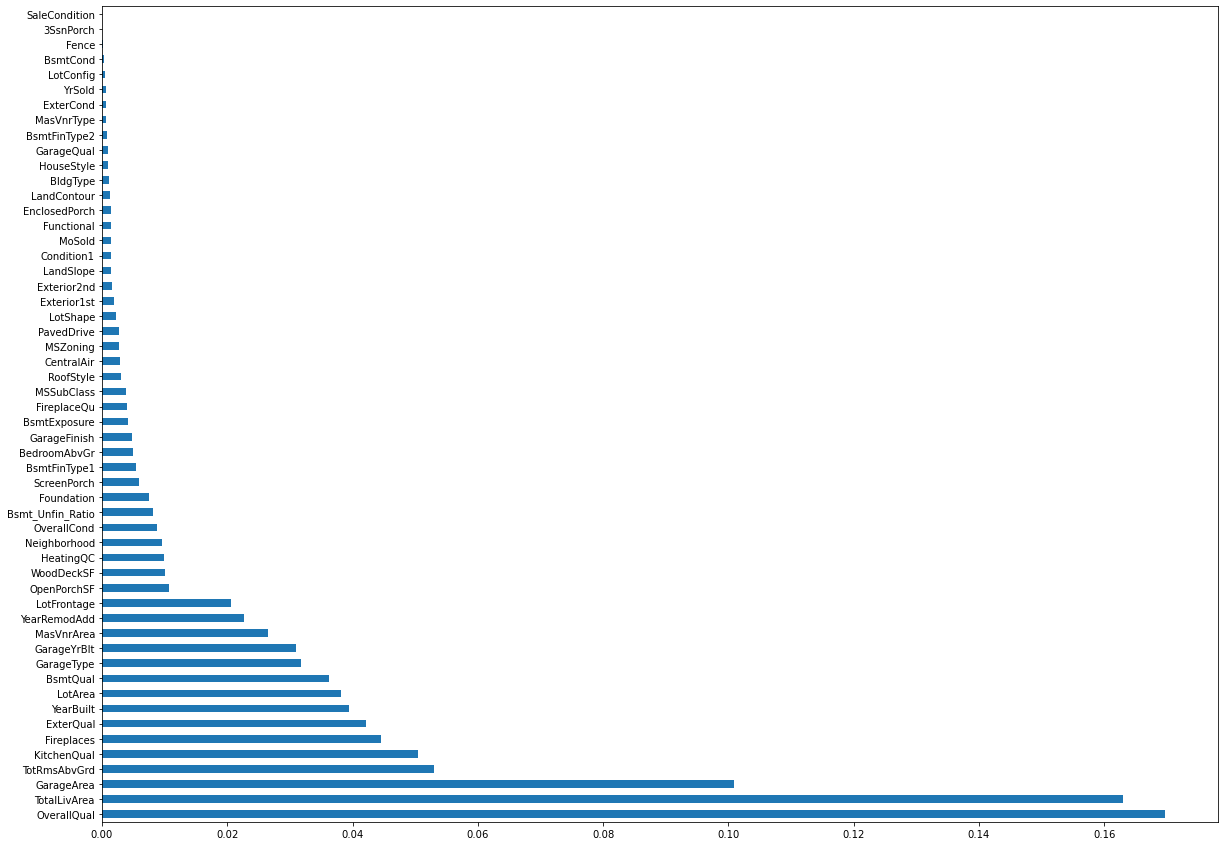


[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.6;, score=0.926 total time=   2.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.8;, score=0.926 total time=   2.2s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.4;, score=0.936 total time=   1.6s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.4;, score=0.924 total time=   1.6s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.7;, score=0.919 total time=   1.9s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.9;, score=0.940 total time=   2.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=900, subsample=0.4;, score=0.922 total time=   1.6s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=900, subsample=0.7;, score=0.926 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.9;, score=0.937 total time=   2.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.4;, score=0.915 total time=   1.7s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.7;, score=0.924 total time=   2.3s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.8;, score=0.921 total time=   2.3s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.4;, score=0.935 total time=   1.6s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.7;, score=0.941 total time=   1.9s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.8;, score=0.921 total time=   2.0s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=900, subsample=0.4;, score=0.925

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.4;, score=0.923 total time=   1.6s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.6;, score=0.925 total time=   2.2s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.8;, score=0.943 total time=   2.3s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.9;, score=0.916 total time=   2.5s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.6;, score=0.915 total time=   1.8s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.8;, score=0.939 total time=   2.0s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.9;, score=0.918 total time=   2.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=900, subsample=0.6;, score=0.92

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.6;, score=0.933 total time=   1.9s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.8;, score=0.940 total time=   2.1s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.9;, score=0.915 total time=   2.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.6;, score=0.918 total time=   2.2s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.8;, score=0.927 total time=   2.3s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.9;, score=0.909 total time=   2.5s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.6;, score=0.932 total time=   1.8s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.8;, score=0.935

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.4;, score=0.923 total time=   1.6s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.7;, score=0.928 total time=   2.0s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=950, subsample=0.8;, score=0.919 total time=   2.1s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.4;, score=0.933 total time=   1.6s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.7;, score=0.943 total time=   2.4s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.8;, score=0.921 total time=   2.3s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.4;, score=0.923 total time=   1.6s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.6;, score=0.934

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 


[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.7;, score=0.935 total time=   2.3s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=7, n_estimators=1000, subsample=0.9;, score=0.940 total time=   2.5s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.4;, score=0.919 total time=   1.6s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.7;, score=0.932 total time=   1.9s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=850, subsample=0.8;, score=0.931 total time=   2.1s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=900, subsample=0.4;, score=0.930 total time=   1.6s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=900, subsample=0.7;, score=0.939 total time=   2.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=8, n_estimators=900, subsample=0.8;, score=0.925 

In [20]:
importantfeats.plot.barh(figsize = (20, 15))


In [23]:
gbpred = grid_search.predict(X_test)
gbpred

array([150856.82795697, 148390.98791797, 178011.19221631, 164793.96287138,
       104477.09455467, 235963.50402277,  99070.07374779,  99055.76700277,
        83959.63398728, 238214.82123579, 259919.38031005, 125417.82839755,
       165120.47051501, 206952.40650983, 111808.4705825 , 167287.23002288,
       191756.80975535, 170661.12380037, 107950.23171275, 155002.36995635,
       161990.34564114, 236995.5198667 , 191831.59110988, 129027.14680481,
       110325.76740448, 175237.89209794, 168158.07106582, 101567.38223231,
       204087.62720942, 165984.8940487 , 131203.97473931, 107055.0432633 ,
       130021.19343422, 139963.89179234, 182748.63311635, 128269.55511734,
       255660.63000963, 143980.45823169,  86684.37075358, 135050.62000487,
       137689.8384257 , 127764.40859505, 128590.50128265, 219993.78285559,
       158081.50342782, 110877.77218473, 255524.89980288, 162496.38219461,
       272988.20153024, 118214.21796629, 325405.15699439, 122046.18323815,
       192748.1698278 , 3

## STACKING THEM MODELS

In [29]:
ytest = pd.read_csv('newytest.csv')
ytest = np.exp(ytest)
ytest['gbpred'] = gbpred
ytest['overallpred'] = ytest.iloc[:, 1:4].mean(axis=1)
ytest

,SalePrice,lassopred,svrpred,gbpred,overallpred
0,174000.0,153463.065370,154089.496566,150856.827957,152803.129965
1,141000.0,141690.360590,153534.162738,148390.987918,147871.837082
2,175900.0,185292.312242,174089.004019,178011.192216,179130.836159
3,160200.0,187769.690829,172442.354487,164793.962871,175002.002729
4,107900.0,107056.295794,110779.202511,104477.094555,107437.530953
...,...,...,...,...,...
477,140000.0,135360.880592,132885.133102,130623.396285,132956.469993
478,134000.0,127308.418629,132976.938444,139991.573471,133425.643515
479,175000.0,200003.115058,192083.224630,193057.292632,195047.877440
480,127000.0,126833.853613,131012.608366,126456.710457,128101.057479


# HIGH SCORE??

In [30]:
from sklearn.metrics import r2_score

ytrue = ytest["SalePrice"].tolist()
ypred = ytest["overallpred"].tolist()
r2 = r2_score(ytrue, ypred)
r2

0.9532393465056086